In [1]:
## irisデータの中身を確認する。
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
## データを可視化して俯瞰する。

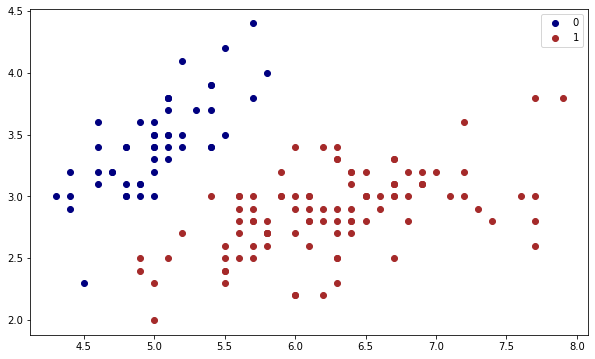

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# データのプロット図を作成
iris = datasets.load_iris()
# 二次元配列を格納する。
X = iris.data[:, :2]
y = np.where(iris.target!=0, 1, iris.target)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='navy', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='brown', label='1')
plt.legend();

In [6]:
import numpy as np
from sklearn.datasets import load_iris 

def add_intercept(X):
    # 線形重回帰を計算するための行列を作成
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    # シグモイド関数
    return 1/(1 + np.exp(-z))

def cross_entropy(h, y):
    # 交差エントロピー誤差
    return (-y * np.log(h) - (1 - y) * np.log(1 - h).mean())

def predict_prob(X, theta):
    # 交差エントロピー誤差が一番小さい最新の重みを利用してXのデータから確率の予測値を出力
    X = add_intercept(X)
    return sigmoid(np.dot(X, theta))

def predict(X, theta):
    # 0.5以上の予測値は、1それ以外は0として出力する。
    return predict_prob(X, theta).round()

In [7]:
# 誤差を見ながら学習率を調整していく。
# 学習率(learning rate)を調整しながら、重みを更新していき、交差エントロピー誤差が限りなく0に近づくぐらいの時の最適な学習率を見つける。
lr = 0.1
# 更新回数
iter_nums = 300000

X = add_intercept(X)
# 重みの初期化
theta = np.zeros(X.shape[1])
# 最急降下法
for i in range(iter_nums):
    z = np.dot(X, theta)
    h = sigmoid(z)
    # 勾配を計算する
    gradient = np.dot(X.T, (h - y)) / y.size
    # 重みを更新する
    theta = theta - lr * gradient
    # 交差エントロピー誤差を保存
    loss = cross_entropy(h, y)
    if(i % 10000 == 0):
        # 10000回ごとに誤差を出力する。
        print(f'loss: {loss} ¥t')
        
# 確率値を予測する
iris = load_iris()
X = iris.data[:, :2]
predict_prob(X, theta)
# 確率値を使って分類ラベルを予測する
predict(X, theta)

loss: [0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

ValueError: Invalid RGBA argument: 'block'

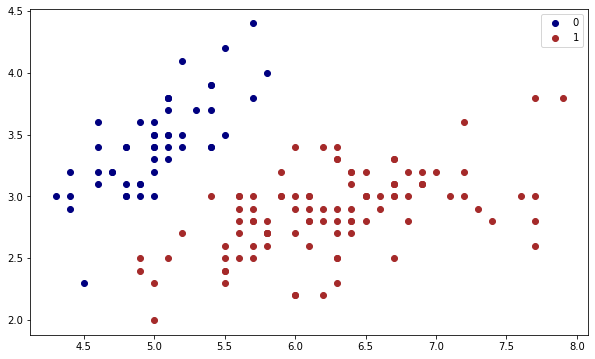

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# データをプロットする
plt.figure(figsize=(10, 6))
plt.scatter(X[y ==0][: ,0], X[y ==0][: ,1], color='navy', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='brown', label='1')
plt.legend();

# X軸とY軸のスケールを定義する
x_min, x_max = X[:, 0].min(), X[: , 0].max()
y_min, y_max = X[:, 1].min(), X[: , 1].max()
# 縦軸と横軸を表示する
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
grid = np.c_[xx.ravel(), yy.ravel()]
# 結果を表示する
probs = predict_prob(grid, theta).reshape(xx.shape)
#線を引く
plt.contour(xx, yy, probs, [0.5], linewidths=1, colors='black')